# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set_style('darkgrid')


In [38]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [39]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


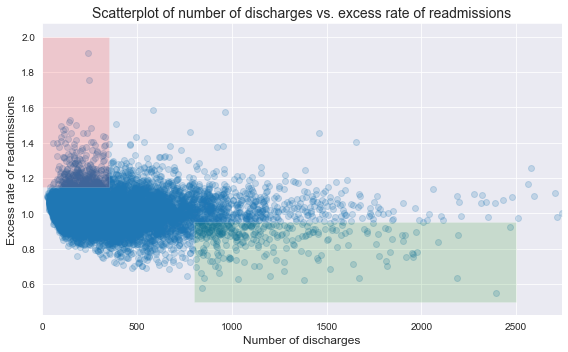

In [40]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Text(0.5, 1.0, 'Regression of Readmission Ratio against Discharges')

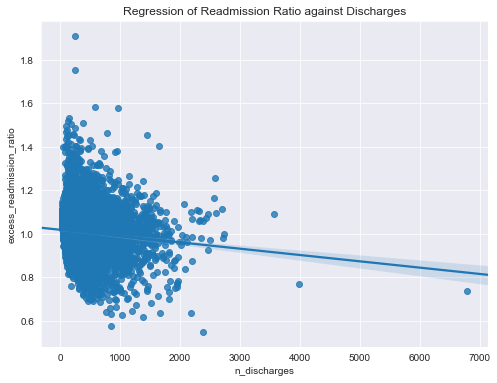

In [41]:
readmissions = clean_hospital_read_df
readmissions.columns = ['hospital_name', 'provider_number', 'state', 'measure_name',
       'n_discharges', 'footnote', 'excess_readmission_ratio',
       'predicted_readmission_rate', 'expected_readmission_rate',
       'n_readmissions', 'start_date', 'end_date']

plt.figure(figsize=[8, 6])
sns.regplot(x='n_discharges',
            y='excess_readmission_ratio',
            data=readmissions[readmissions['n_discharges'] != 0])
plt.title('Regression of Readmission Ratio against Discharges')

-----

#### Interpreting the preliminary report part A:

Yes, it does initially look like there is a weak negative relationship if you fit a linear regression to this specific view of the data.
However:
    * No exploration is done to see if the readmission rate varies by state
    * No exploration is done to see if specific methods are associated with more frequent readmission
    
Without exploring these other possible confounding variables, the explanations put forth may not show the complete picture of influencing factors.

-----


**It is also important to plot the residuals to see if a linear relationship is the right fit for the underlying structure**

Text(0.5, 1.0, 'Residual plot for linear fit of Readmissions Ratio vs Discharges')

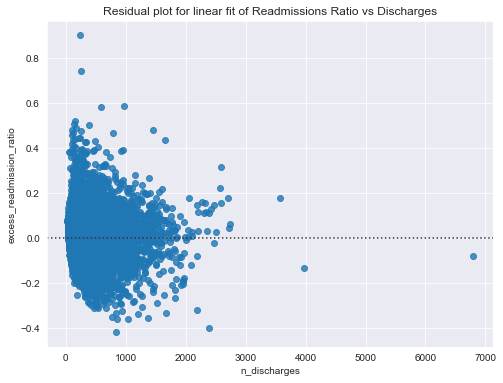

In [42]:
plt.figure(figsize=[8, 6])

#plot readmission ratios among hospitals when there was at least one patient discharged
sns.residplot(x='n_discharges',
            y='excess_readmission_ratio',
            data=readmissions[readmissions['n_discharges'] != 0])
plt.title('Residual plot for linear fit of Readmissions Ratio vs Discharges')

------


**The residual plot shows no need for higher order fitting at this point. There is a negative linear relationship between number of discharges and excess readmissions ratio. However, let's explore how much readmission ratio varies by state**


------

Text(0.5, 1.0, 'Excess Readmission Ratio by State')

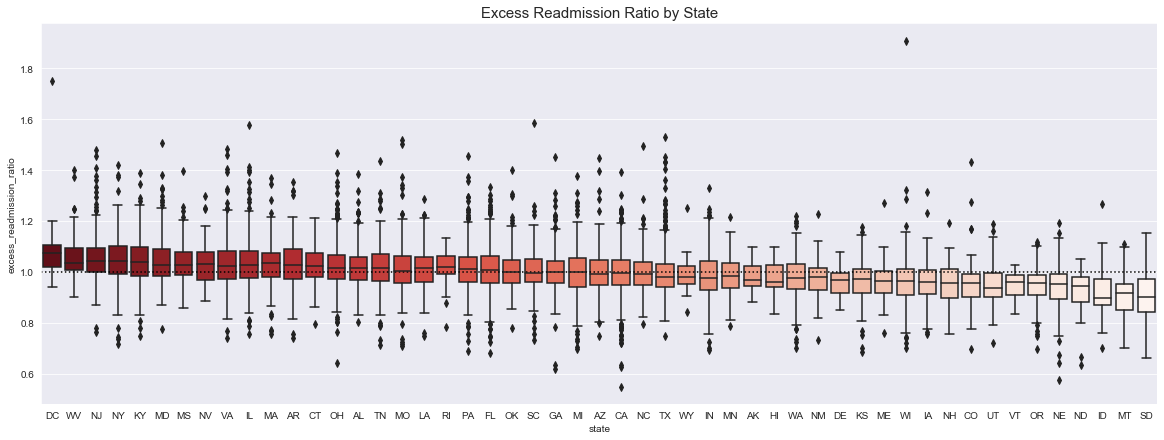

In [43]:
state_rates= readmissions.pivot_table(values='excess_readmission_ratio', index='state', aggfunc=np.mean).sort_values(by='excess_readmission_ratio', ascending=False)

#plot excess readmission ratio distribution by state
plt.figure(figsize=[20,7])
sns.boxplot(x='state', y='excess_readmission_ratio', data=readmissions[readmissions['n_discharges']!=0],
           orient='v',
           order=state_rates.index.tolist(),
           palette = 'Reds_r')

#plot excess readmission rate of 1 for visual anchor
plt.axhline(y=1, color='k', linestyle='dotted')
plt.title('Excess Readmission Ratio by State', fontsize=15)

**Excess Readmission Ratio does vary by state. Some states like the District of Columbia and West Virginia have higher readmission ratios than others like Montana or South Dakota**

-----




### Testing the preliminary statistical findings



#### Claim 1:
In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1


In [44]:
low_dis = readmissions[(readmissions.n_discharges < 100)
                       & (readmissions.n_discharges > 0)]

readmission_mean = round(np.mean(low_dis.excess_readmission_ratio), 3)

freq_result = round(
    len(low_dis[low_dis.excess_readmission_ratio > 1]) / len(low_dis) * 100, 0)

print('mean readmission:', readmission_mean, '\nFrequency of rate > 1:', freq_result)

mean readmission: 1.023 
Frequency of rate > 1: 63.0


**I arrived at the same result for these summary statistics (claim 1) among facilities with less than 100 discharges**


#### Claim 2:
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [45]:
high_dis = readmissions[readmissions.n_discharges > 1000]

readmission_mean = round(np.mean(high_dis.excess_readmission_ratio), 3)

freq_result = round(
    len(high_dis[high_dis.excess_readmission_ratio > 1]) / len(high_dis) * 100, 0)

print('mean readmission:', readmission_mean, '\nFrequency of rate > 1:', freq_result)

mean readmission: 0.978 
Frequency of rate > 1: 44.0


**I arrived at the same result for these summary statistics (claim 2) among facilities with more than 1000 discharges**

-----

### Testing the Conclusions

#### Conclusion 1:
There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


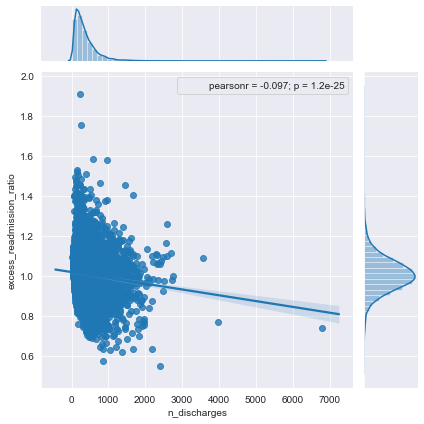

In [46]:
from scipy import stats
_ = sns.jointplot('n_discharges', 'excess_readmission_ratio', data=readmissions, kind='reg')
_.annotate(stats.pearsonr)

**There does exist a significant correlation between number of discharges and the readmission rates. The p value demonstrates statistical significance but strength of the correlation is weak overall**

Text(0.5, 1.0, 'Excess Readmission Ratio by condition')

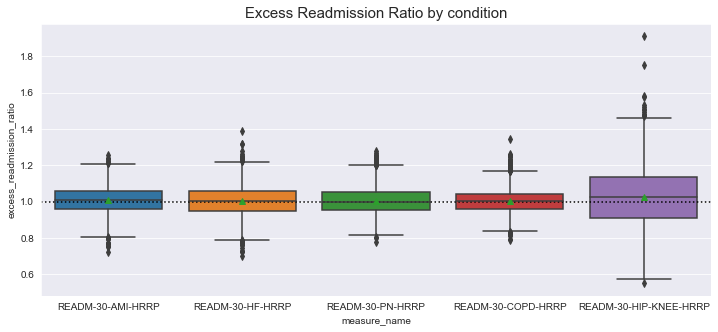

In [47]:
plt.figure(figsize=[12,5])
sns.boxplot(x='measure_name', y='excess_readmission_ratio', data=readmissions[readmissions['n_discharges']!=0],
           orient='v',
           showmeans=True)
plt.axhline(y=1, color='k', linestyle='dotted')
plt.title('Excess Readmission Ratio by condition', fontsize=15)

##### Does readmission ratio vary by condition?

**The excess readmissions ratio does not vary much by condition. Hip and Knee replacements do exhibit greater variance in excess readmission rates than other types of conditions measured**

#### Conclusion 2:
Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


This may or may not be true and I see no reasonable way to truly test this given the data at hand. If the US government's Center for Medicare and Medicaid Services wishes to better understand this I would recommend collecting data including any key metrics of "quality" care across the spectrum of hospital sizes. Without knowing why readmissions arose, this is a tenuous claim to make. It could be influenced by geography (patients traveling different distances for care, access to public transportation) or health variation due to traits like age, sex, median income, or insurance coverage among those accessing care.

### Discussing Preliminary Policy Recommendations

##### Proposal 1
Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

----

Without evidence that upgrading resource allocation for quality care influences the readmission rates, this approach seems misguided by the data. I propose a re-framing of the issue focusing on care facilities that have readmission rates both above 1 that are also outliers in their state.  These facilities would have higher than expected readmission rates and have much higher rates than those in their state. 

Aggregating operational approaches from care facilities of approximately equal scale may prove helpful in spurring innovation. Similarly, surveying for the frequency of quality care approaches across facilities at multiple scales where readmission rates are lower may help in identifying key processes in mitigating readmittance.

##### Proposal 2

Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

----

Depending on the roots of readmission events, this may be true. If readmission is frequently a product of geographic isolation from care (i.e. it's too far to drive to go to the surgery checkup 60 days later), consolidation of hospitals may exacerbate this effect. For other causes, one may expect it to help (think available business hours, reduced wait times, funding for more highly qualified practitioners, etc). Again, without understanding the contributing factors for patient readmission, this policy lacks sufficient evidence.

I hypothesize that there is significant state variation in the means.
More formally stated:

H<sub>0</sub>: There is no difference in mean excess readmission rates among states

H<sub>a</sub>: There is a difference in mean excess readmission rates among states

In [48]:
from scipy import stats

#slice state and readmission ratio from dataframe
state_and_rate = readmissions[['state', 'excess_readmission_ratio']]
state_and_rate = state_and_rate.reset_index()

#separate into DC and SD state values of excess_readmission_ratios sans NaNs that may be present
dc = state_and_rate[state_and_rate.state ==
                    'DC']['excess_readmission_ratio'].dropna()
sd = state_and_rate[state_and_rate.state ==
                    'SD']['excess_readmission_ratio'].dropna()

#print summary stats
print('District of Columbia excess_readmission_ratio summary stats:\n',
      dc.describe())
print('\n')
print('South Dakota excess_readmission_ratio summary stats:\n', sd.describe())
print('\n')

#run independent samples t test to check if means are significantly different from each other
statistic, p = stats.ttest_ind(dc, sd)
print(
    'The test statistic is {} and p value is {} which indicates that the null hypothesis cannot be rejected.'.format(statistic, p),
    'The District of Columbia and South Dakota have signficantly different excess readmission ratio means at alpha=0.01')
    

District of Columbia excess_readmission_ratio summary stats:
 count    29.000000
mean      1.087121
std       0.140087
min       0.939400
25%       1.019900
50%       1.074800
75%       1.105900
max       1.752100
Name: excess_readmission_ratio, dtype: float64


South Dakota excess_readmission_ratio summary stats:
 count    41.000000
mean      0.909824
std       0.099959
min       0.660000
25%       0.841600
50%       0.903100
75%       0.973600
max       1.152300
Name: excess_readmission_ratio, dtype: float64


The test statistic is 6.18483989150446 and p value is 4.0301006708812007e-08 which indicates that the null hypothesis cannot be rejected. The District of Columbia and South Dakota have signficantly different excess readmission ratio means at alpha=0.01


----

This is a good time to discuss practical vs statistical significance. We say something is statistically significant when the likelihood of observing the results captured while the null hypothesis is actually true meets some probability threshold (often 5% of the time or less often). However, these t-tests in use here aren't as clear when translating that back to practical signficance, or what will make an impact in the use case which would necessitate attention or further investigation.


For example:
Say you have an extremely precise mouth thermometer which can detect temperatures in ten-thousandths of a degree. If you collected data on your own temperature when you first wake up and later when you go to bed for the course of a month, there may be a statistically significant difference in the mean temperatures. Let's say that the difference was 0.0008 degrees on average between morning and nighttime. However, this hypothetical does not demonstrate much practical significance. The difference is not so much that you need additional blankets or to raise a concern of a health risk. You likely won't ever notice. Essentially, it is detectable but does not require any action to address it.

----


A better scatterplot that demonstrates this relationship across states may look something like this:

In [49]:
a = readmissions.pivot_table(values=['excess_readmission_ratio', 'n_discharges'], index='state', aggfunc=np.median)
a = a.reset_index()
a.columns = ['state','ratio','n_discharges']

Text(0.5, 1.0, 'Excess Readmission Rates by Number of Discharges Across States')

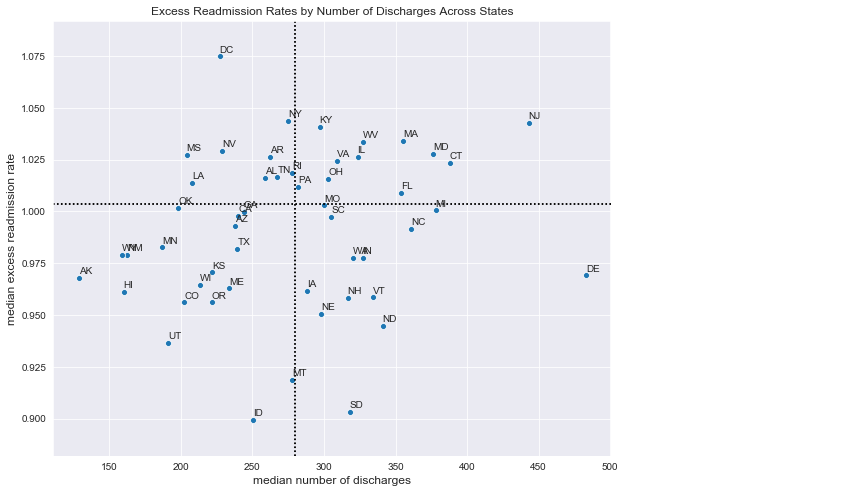

In [50]:
plt.figure(figsize=[10,8])
sns.scatterplot(x='n_discharges', y='ratio', data = a)

#annotate points with state abbreviation
for i, j in enumerate(a['state']):
    plt.annotate(
        a.state[i],
        (a.n_discharges[i],
         a.ratio[i]+0.002))

#determine overall mean values for discharges and readmission rates
median_discharges = np.median(readmissions.n_discharges.dropna())
median_rate = np.median(readmissions.excess_readmission_ratio.dropna())

#annotate plot with overall means
plt.axhline(y=median_rate, color='k', linestyle='dotted')
plt.axvline(x=median_discharges, color='k', linestyle='dotted')
plt.annotate('Above-Median \ndischarged and \nreadmissions',(615,1.075))

plt.axhline(y=median_rate, color='k', linestyle='dotted')
plt.axvline(x=median_discharges, color='k', linestyle='dotted')

plt.xlabel('median number of discharges', fontsize=12)
plt.ylabel('median excess readmission rate', fontsize=12)
plt.title('Excess Readmission Rates by Number of Discharges Across States')

**The median number of discharges and rate of readmissions across all facilities is displayed as dotted lines on the plot. Each point represents the median value for all facilities in each state**

From this, perhaps states in the sub-median readmission rate portion (below the horizontal line) can develop recommendations on care practices for states operating at the same scale (similar number of discharges) but at higher readmission rates

### Revised Policy Advice

I propose indexing the original data by facilities that are outliers within their state's distribution of readmission rates while also having a rate above 1. This leaves 762 facilities as high priority targets to investigate first.

In [51]:
# isolate any care facility with rate > 1.5 iqr of the state rate distribution
targets = []
for code in readmissions.state.unique():
    df1 = readmissions[readmissions['state'] == code].copy()
    df2 = df1[['provider_number','excess_readmission_ratio']]
    lower,upper = np.percentile(df2['excess_readmission_ratio'].dropna(), [25, 75])
    iqr = upper-lower
    lower_bound = lower-1.5*iqr
    upper_bound = upper+1.5*iqr
    high_ratio_providers = df2[df2['excess_readmission_ratio'] > upper_bound]
    a = high_ratio_providers['provider_number'].tolist()
    targets.append(a)
    

    
#add all provider numbers to one list
merged_targets = []
for item in targets:
    merged_targets += item

In [52]:
#index dataframe by sites that have a excess_readmission_ratio above 1.5IQR Of their state and above 1
high_readmission_care = readmissions[(readmissions.provider_number.isin(merged_targets)) & (readmissions.excess_readmission_ratio>1)]
high_readmission_care.sample(8)


,hospital_name,provider_number,state,measure_name,n_discharges,footnote,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,n_readmissions,start_date,end_date
2493,NORTHWESTERN MEMORIAL HOSPITAL,140281,IL,READM-30-AMI-HRRP,265,NaN,1.0724,18.6,17.3,53.0,07/01/2010,06/30/2013
770,SUSAN B ALLEN MEMORIAL HOSPITAL,170017,KS,READM-30-PN-HRRP,172,NaN,1.1443,19.0,16.6,41.0,07/01/2010,06/30/2013
102,SEBASTIAN RIVER MEDICAL CENTER,100217,FL,READM-30-HIP-KNEE-HRRP,212,NaN,1.2847,6.8,5.3,19.0,07/01/2010,06/30/2013
3578,ST MARY'S HEALTH CENTER,260011,MO,READM-30-AMI-HRRP,118,NaN,1.0490,16.5,15.7,22.0,07/01/2010,06/30/2013
4865,ORLANDO REGIONAL MEDICAL CENTER,100006,FL,READM-30-AMI-HRRP,572,NaN,1.0268,19.2,18.7,111.0,07/01/2010,06/30/2013
146,WYOMING MEDICAL CENTER,530012,WY,READM-30-HIP-KNEE-HRRP,283,NaN,1.2516,6.3,5.1,22.0,07/01/2010,06/30/2013
193,UNIVERSITY OF ALABAMA HOSPITAL,10033,AL,READM-30-PN-HRRP,505,NaN,1.2371,20.8,16.8,118.0,07/01/2010,06/30/2013
42,PENNSYLVANIA HOSP OF THE UNIV OF PA HEALTH SYS,390226,PA,READM-30-HIP-KNEE-HRRP,921,NaN,1.3746,7.6,5.5,76.0,07/01/2010,06/30/2013
